In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [45]:
df = pd.read_excel(r"../data/vrpp_clean.xlsx")


In [43]:
df.head()

,Berth ID,Vessel ID,Local Port,Remote Port,Trade,Container Type,ETA,ETD,Has Dasngerous Cargo,Dry/Reefer,...,Arrival Date,Sailing Date,Containers,Delay Duration,Service Days,TEU,Delay_Status,Sailing Season,Load Factors,ETA_week
0,1,Vessel_001,BREMERHAVEN,NANSHA,SOUTH CHINA + HONG KONG,40HC,2025-01-03,2025-01-05,False,Dry,...,2024-12-31,2025-01-01,1,4.00:00:00,5,2,Major Delay,Winter,2,1
1,2,Vessel_001,FELIXSTOWE,NANSHA,SOUTH CHINA + HONG KONG,40HC,2025-01-03,2025-01-05,False,Dry,...,2024-12-31,2025-01-01,1,4.00:00:00,5,2,Major Delay,Winter,2,1
2,3,Vessel_001,HAMBURG,NANSHA,SOUTH CHINA + HONG KONG,45HC,2025-01-06,2025-01-09,False,Dry,...,2025-01-02,2025-01-05,1,4.00:00:00,7,1,Major Delay,Winter,1,2
3,4,Vessel_001,HAMBURG,NANSHA,SOUTH CHINA + HONG KONG,20DV,2025-01-06,2025-01-09,False,Dry,...,2025-01-02,2025-01-05,1,4.00:00:00,7,1,Major Delay,Winter,1,2
4,4,Vessel_001,HAMBURG,NANSHA,SOUTH CHINA + HONG KONG,20DV,2025-01-06,2025-01-09,False,Dry,...,2025-01-02,2025-01-05,1,4.00:00:00,7,1,Major Delay,Winter,1,2


In [32]:
# Numerical summary
numeric_df = df.select_dtypes(include=np.number)

desc = numeric_df.describe().T
desc["missing"] = df[numeric_df.columns].isnull().sum()
desc["unique"] = df[numeric_df.columns].nunique()
display(desc)

,count,mean,std,min,25%,50%,75%,max,missing,unique
Berth ID,378763.0,2.503624,1.118345,1.0,2.0,3.0,4.0,4.0,0,4
Container Size,378763.0,33.276429,9.464292,20.0,20.0,40.0,40.0,45.0,0,3
Weight KGS,378763.0,70679.144424,181228.418951,0.1,9546.0,21562.0,54000.0,10484160.0,0,227811
Containers,378763.0,4.181546,8.964678,1.0,1.0,1.0,4.0,417.0,0,221
Service Days,378763.0,6.747813,7.068994,-198.0,2.0,5.0,9.0,365.0,0,161
TEU,378763.0,7.036928,15.741475,1.0,2.0,2.0,6.0,834.0,0,289
Load Factors,378763.0,1.660748,0.473456,1.0,1.0,2.0,2.0,2.0,0,2


In [33]:
# Categorical summary
cat_df = df.select_dtypes(include=["object", "bool"])
for col in cat_df.columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(5))


Vessel ID: 8958 unique values
Vessel ID
Vessel_334     1601
Vessel_1084    1295
Vessel_1080    1210
Vessel_529     1189
Vessel_990     1111
Name: count, dtype: int64

Local Port: 341 unique values
Local Port
HAMBURG        72898
BREMERHAVEN    50670
ANTWERP        28390
ROTTERDAM      24812
GDANSK         23499
Name: count, dtype: int64

Remote Port: 454 unique values
Remote Port
SHANGHAI          26573
NINGBO            23070
YANTIAN           16226
QINGDAO           15409
TIANJINXINGANG     9388
Name: count, dtype: int64

Trade: 37 unique values
Trade
NORTH CHINA                78075
SOUTH CHINA + HONG KONG    33943
SOUTH EAST ASIA            32585
EAST MEDITERRANEAN         19847
NORTH INDIA + PAKISTAN     19829
Name: count, dtype: int64

Container Type: 25 unique values
Container Type
40HC    196958
20DV    123390
40DV     28106
40HR     22050
20RE      1614
Name: count, dtype: int64

Has Dasngerous Cargo: 2 unique values
Has Dasngerous Cargo
False    358271
True      20492
Name: 

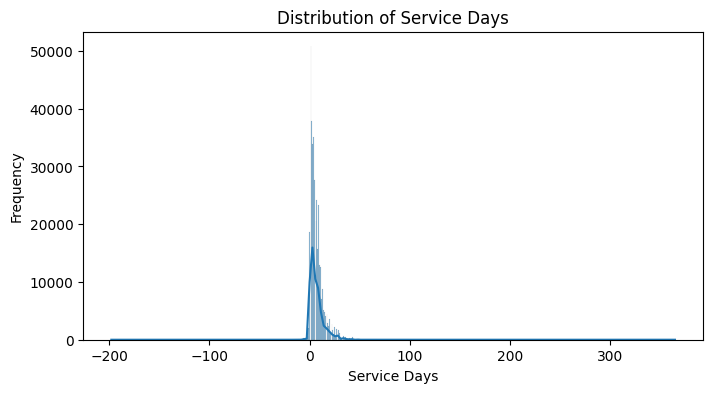

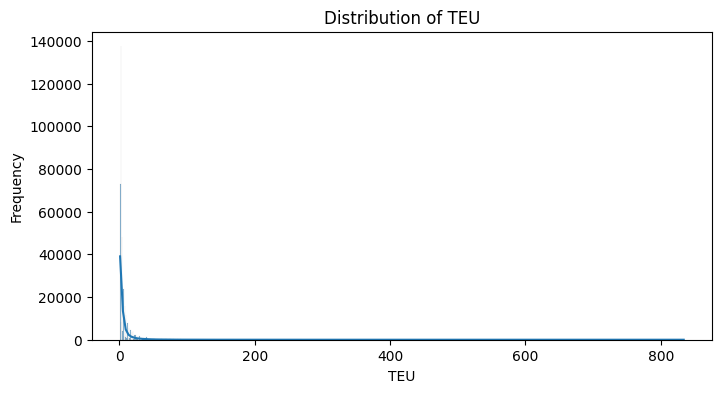

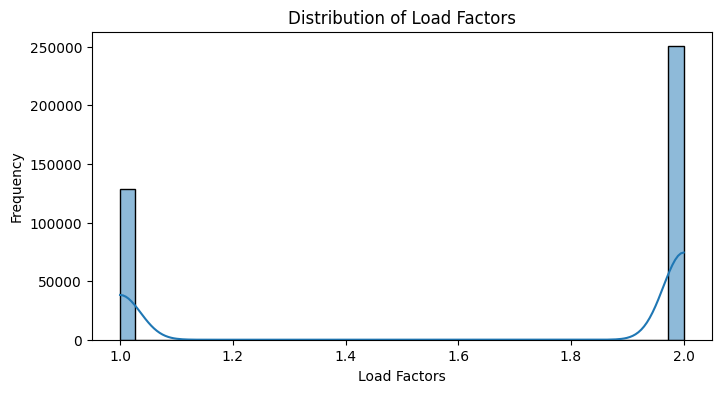

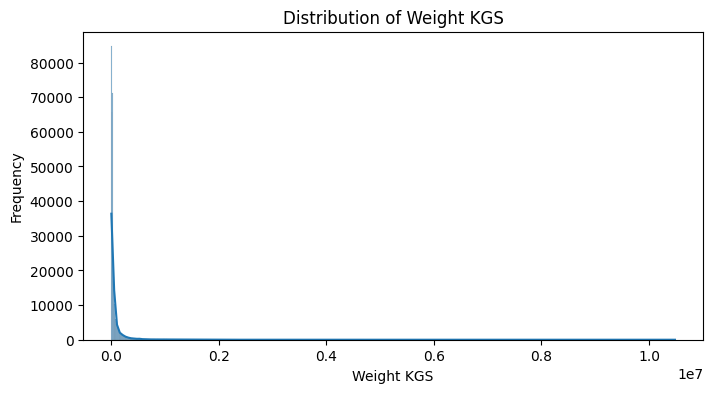

In [34]:
# Delay patterns
features = ["Service Days", "TEU", "Load Factors", "Weight KGS"]
for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

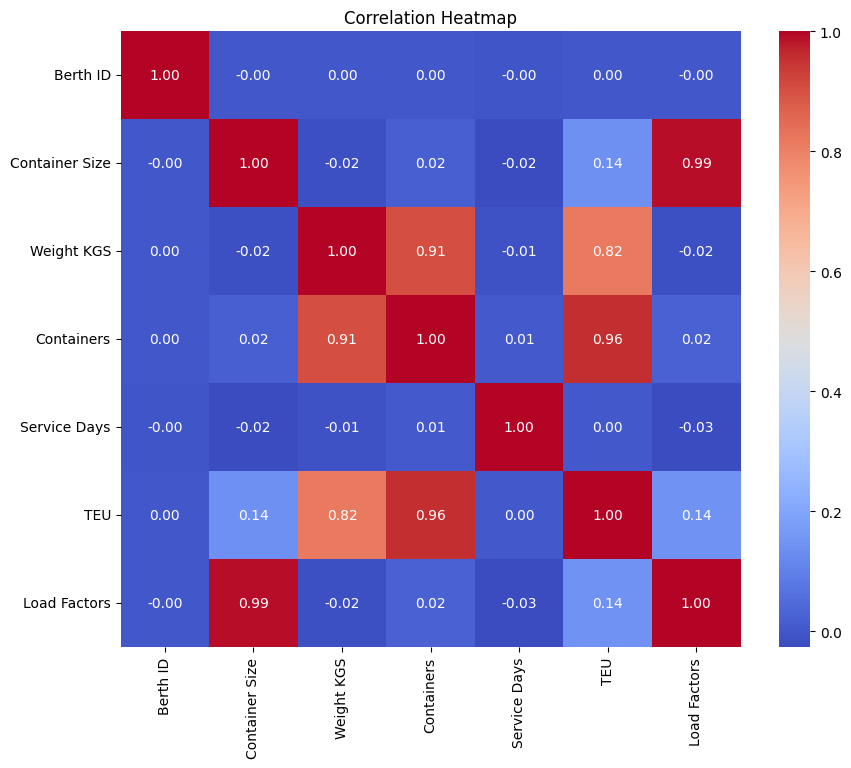

In [35]:
# Correlation
corr = numeric_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

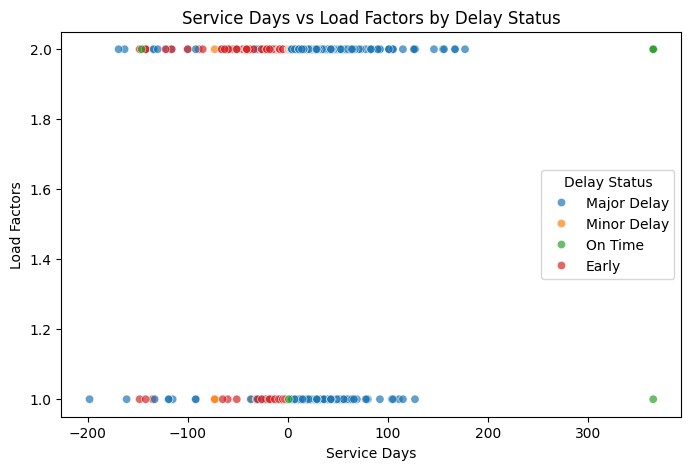

In [36]:
# Delay Duration vs Service Days
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Service Days", y="Load Factors", hue="Delay_Status", alpha=0.7)
plt.title("Service Days vs Load Factors by Delay Status")
plt.xlabel("Service Days")
plt.ylabel("Load Factors")
plt.legend(title="Delay Status")
plt.show()

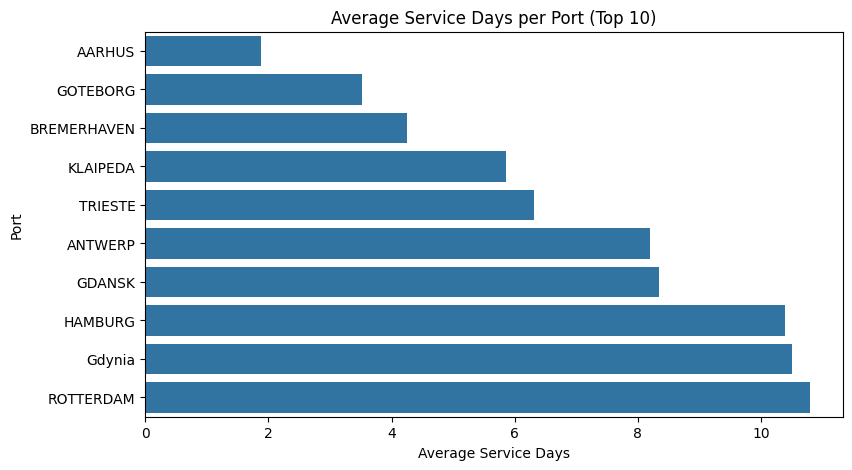

In [37]:
# Average service days per port
top_ports = df["Local Port"].value_counts().head(10).index
avg_service = df[df["Local Port"].isin(top_ports)].groupby("Local Port")["Service Days"].mean().sort_values()

plt.figure(figsize=(9,5))
sns.barplot(x=avg_service.values, y=avg_service.index)
plt.title("Average Service Days per Port (Top 10)")
plt.xlabel("Average Service Days")
plt.ylabel("Port")
plt.show()


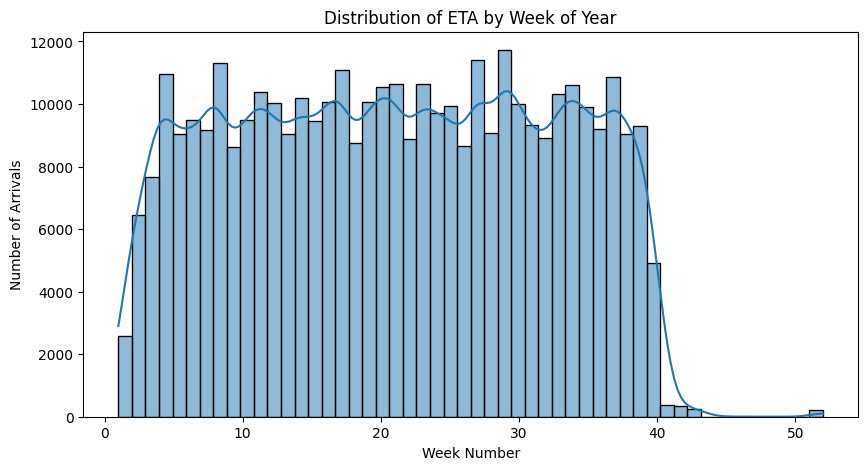

In [38]:
# ETA distribution by week of year
df["ETA_week"] = df["ETA"].dt.isocalendar().week

plt.figure(figsize=(10,5))
sns.histplot(df["ETA_week"], bins=52, kde=True)
plt.title("Distribution of ETA by Week of Year")
plt.xlabel("Week Number")
plt.ylabel("Number of Arrivals")
plt.show()


C:\Users\maxdo\AppData\Local\Temp\ipykernel_24764\3382698811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Sailing Season", y="Load Factors", estimator="mean", ci=None)


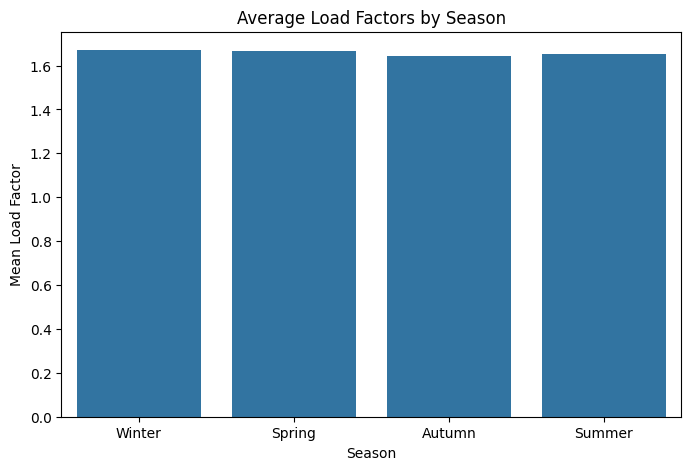

In [39]:
# Average Load Factors by Season
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Sailing Season", y="Load Factors", estimator="mean", ci=None)
plt.title("Average Load Factors by Season")
plt.xlabel("Season")
plt.ylabel("Mean Load Factor")
plt.show()


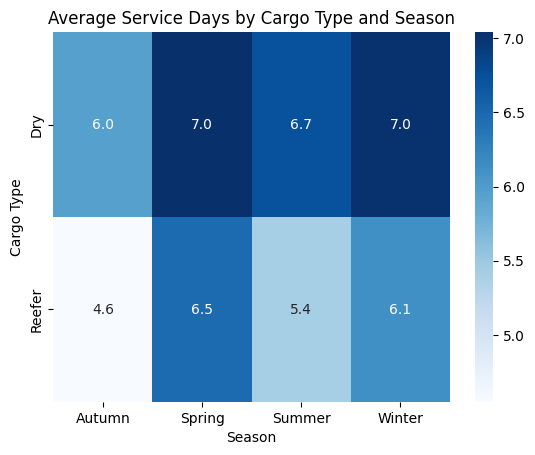

In [40]:
# Cargo Type vs Service Days by Season
pivot = df.pivot_table(
    values="Service Days",
    index="Dry/Reefer",
    columns="Sailing Season",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Average Service Days by Cargo Type and Season")
plt.xlabel("Season")
plt.ylabel("Cargo Type")
plt.show()


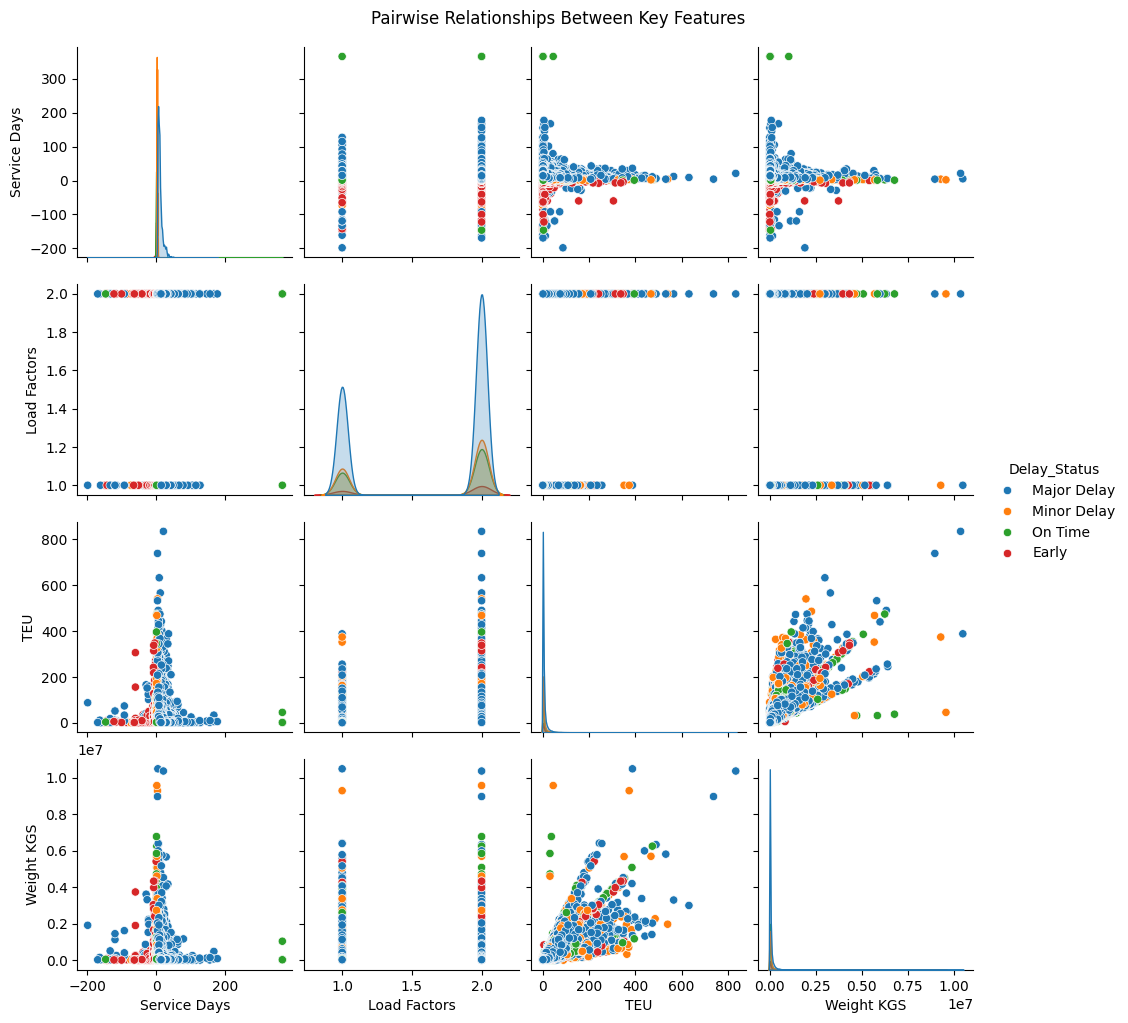

In [ ]:
#Pairwise Relationships Between Key Features
sns.pairplot(df[["Service Days", "Load Factors", "TEU", "Weight KGS", "Delay_Status"]], hue="Delay_Status")
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()


In [46]:
df = df[df["Service Days"] >= 0]


In [47]:
mask_real_error = (df["ETA"] > df["ETD"]) | (df["Arrival Date"] > df["Sailing Date"])
df = df[~mask_real_error]

In [48]:
for c in ["TEU", "Weight KGS"]:
    q = df[c].quantile(0.99)
    df.loc[df[c] > q, c] = q

In [49]:
df["Load_Category"] = np.where(df["Load Factors"] >= 1.5, "High", "Low")

In [51]:
current_rows = len(df)
print(f"📊 Строк после очистки: {current_rows:,}")

📊 Строк после очистки: 374,642


In [ ]:
df.to_parquet("../data/vrpp_ready.parquet", index=False)
print("✅ Clean dataset saved successfully as vrpp_ready.parquet")

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.